In [197]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
data = pd.read_csv('HR_Data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [200]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [201]:
data.dropna()
data.shape

(1470, 35)

In [202]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [203]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [204]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

In [205]:
columns_to_standardize = ["Attrition", "BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus"]
df_sanitized = pd.get_dummies(data, columns=columns_to_standardize)
df_sanitized.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,Life Sciences,1,1,2,94,3,...,False,False,False,False,False,True,False,False,False,True
1,49,279,8,1,Life Sciences,1,2,3,61,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1373,2,2,Other,1,4,4,92,2,...,True,False,False,False,False,False,False,False,False,True
3,33,1392,3,4,Life Sciences,1,5,4,56,3,...,False,False,False,False,True,False,False,False,True,False
4,27,591,2,1,Medical,1,7,1,40,3,...,True,False,False,False,False,False,False,False,True,False


In [206]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18','StockOptionLevel','NumCompaniesWorked',
                  'JobInvolvement','Age','Over18','TotalWorkingYears','NumCompaniesWorked','MaritalStatus','BusinessTravel'],axis=1)

In [207]:
attrition_mapping = {'Yes': True, 'No': False}
data['Attrition'] = data['Attrition'].map(attrition_mapping)

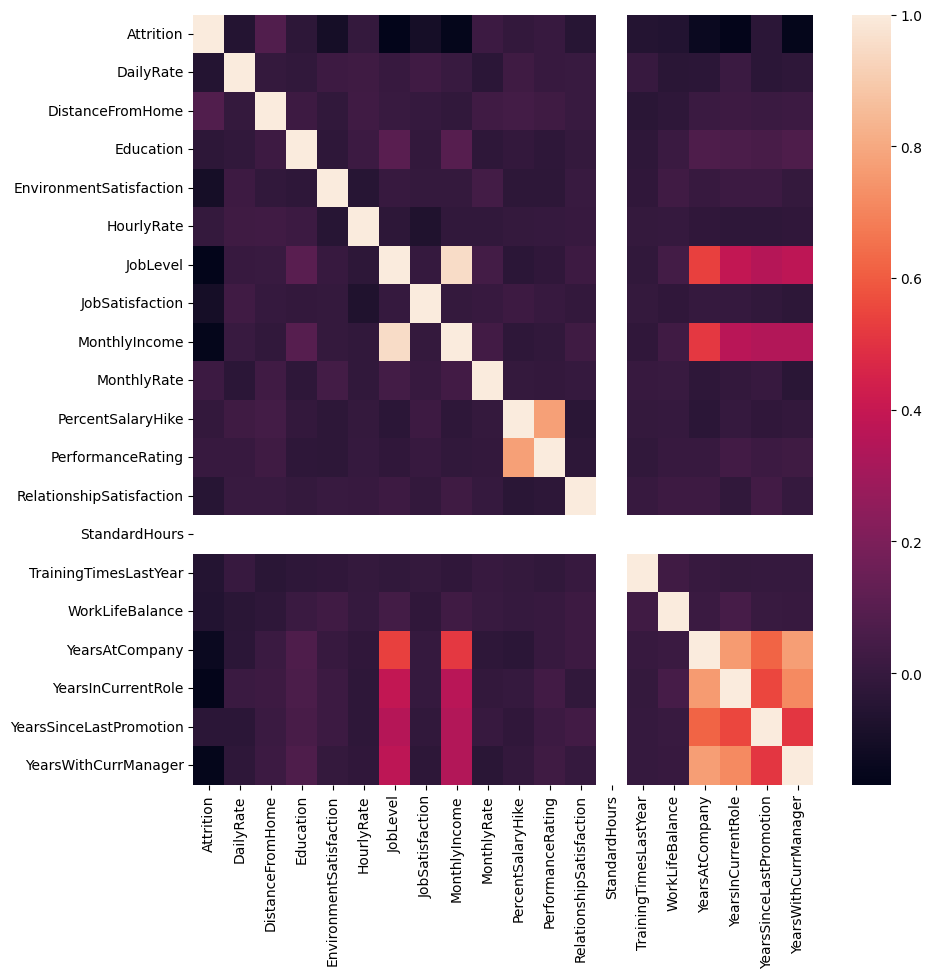

In [208]:
correlation_matrix = data.corr(numeric_only=True,)
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,cbar=True)
plt.show()

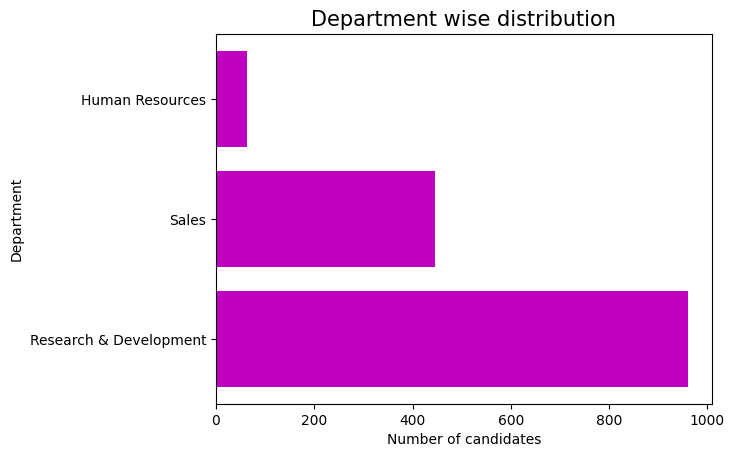

In [209]:
l=data['Department'].value_counts()

plt.barh(l.index,l,color='m')
plt.title("Department wise distribution",fontsize=15)
plt.xlabel('Number of candidates')
plt.ylabel('Department')
plt.show()

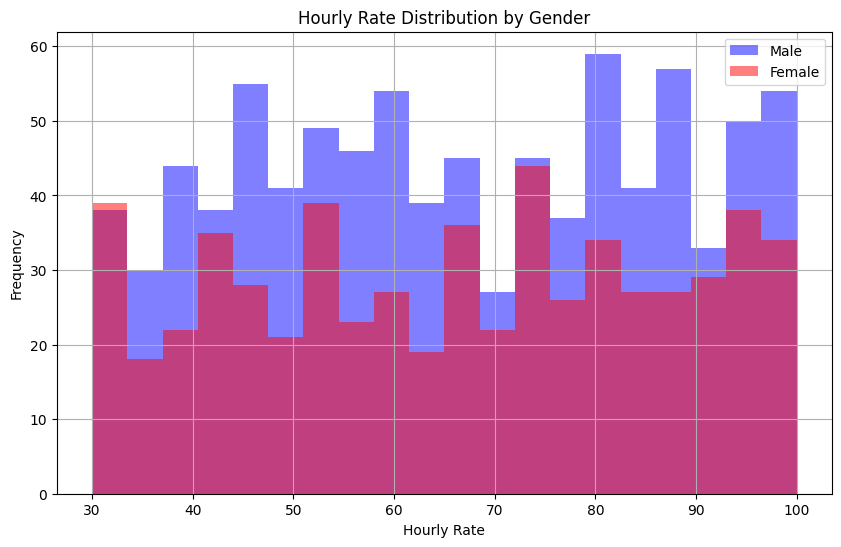

In [210]:
plt.figure(figsize=(10, 6))
male_hourly_rate = data[data['Gender'] == 'Male']['HourlyRate']
female_hourly_rate = data[data['Gender'] == 'Female']['HourlyRate']

plt.hist(male_hourly_rate, bins=20, alpha=0.5, color='blue', label='Male')
plt.hist(female_hourly_rate, bins=20, alpha=0.5, color='red', label='Female')

plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.title('Hourly Rate Distribution by Gender')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


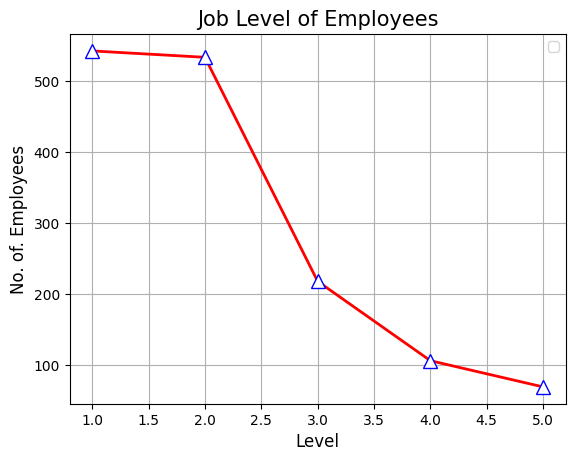

In [211]:
z = data['JobLevel'].value_counts()
plt.plot(z,'r^-',linewidth=2,ms=10,mfc='w',mec='b')

plt.title('Job Level of Employees',fontsize=15)
plt.xlabel("Level",fontsize=12)
plt.ylabel("No. of. Employees",fontsize=12)

plt.grid()
plt.legend()
plt.show()

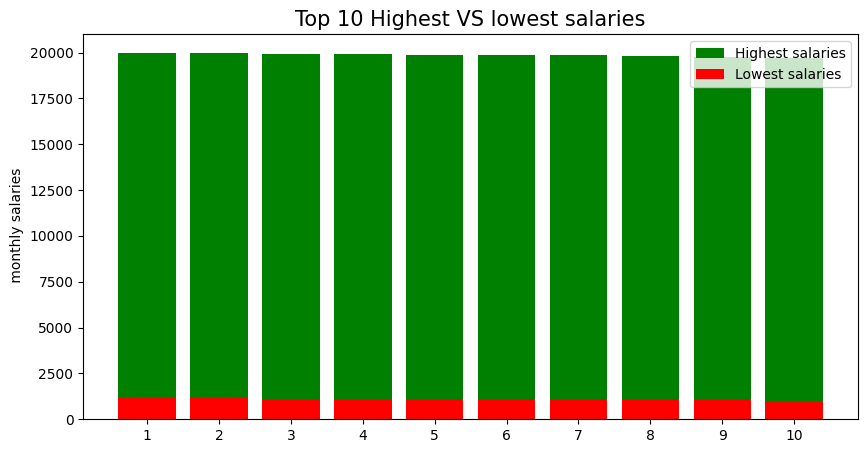

In [212]:
c=[1,2,3,4,5,6,7,8,9,10]
x= data['MonthlyIncome'].sort_values(ascending=False).head(10)
y= data['MonthlyIncome'].sort_values(ascending=False).tail(10)

plt.figure(figsize=(10,5))
plt.bar(c,x,color='g',label="Highest salaries")
plt.bar(c,y,color='r',label="Lowest salaries")

plt.title("Top 10 Highest VS lowest salaries",fontsize=15)

plt.xticks(c)
plt.ylabel(' monthly salaries')
plt.legend()
plt.show()

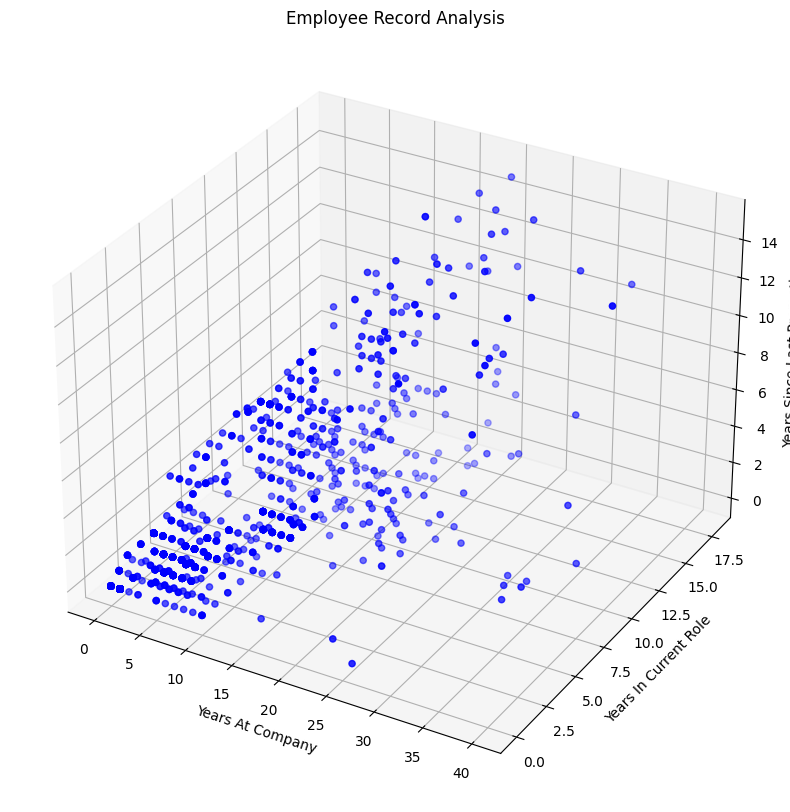

In [215]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = data['YearsAtCompany']
y = data['YearsInCurrentRole']
z = data['YearsSinceLastPromotion']

ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('Years At Company')
ax.set_ylabel('Years In Current Role')
ax.set_zlabel('Years Since Last Promotion')
ax.set_title('Employee Record Analysis')
plt.show()

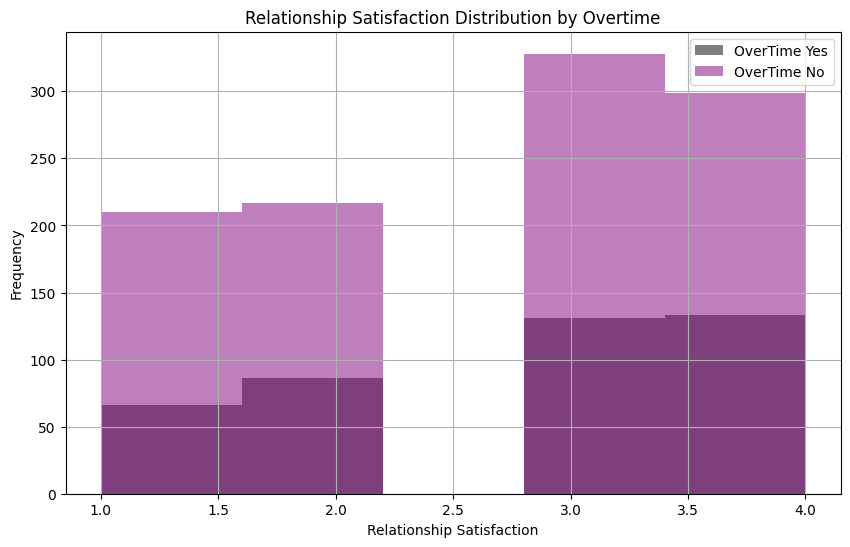

In [214]:
plt.figure(figsize=(10, 6))

# Separate data by OverTime categories
overtime_yes = data[data['OverTime'] == 'Yes']['RelationshipSatisfaction']
overtime_no = data[data['OverTime'] == 'No']['RelationshipSatisfaction']

# Plot histogram for OverTime = Yes
plt.hist(overtime_yes, bins=5, alpha=0.5, color='black', label='OverTime Yes')
# Plot histogram for OverTime = No
plt.hist(overtime_no, bins=5, alpha=0.5, color='purple', label='OverTime No')

plt.xlabel('Relationship Satisfaction')
plt.ylabel('Frequency')
plt.title('Relationship Satisfaction Distribution by Overtime')
plt.legend()
plt.grid(True)

plt.show()
